In [1]:
import pandas as pd
import numpy as np

                                            ## Variavéis do conjunto de dados
###### Importação de componentes elétricos e eletrônicos US$ Milhões  - "Importacao_eletro" e em escala aumentada em 100 "importacao_eletro1"
###### Novos óbitos mensais da covid-19  - "obitos_covid"
###### Faturamento Mundial com as vendas de Semicondutores 1000 USS - "faturamento_semicondutores"
###### Vendas mensais de autoveículos no Brasil - "Vendas"

In [7]:
import sys; print(sys.version)

3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]


In [108]:
dataframe = pd.read_excel('obito_semicondu_fatura.xlsx')

In [109]:
dataframe

,Data,Importacao_eletro,importacao_eletro1,obitos_covid,faturamento_semicondutores,Vendas
0,2013-01-01,1923.327525,192332.7525,0,23128410,282886
1,2013-02-01,1617.160929,161716.0929,0,21104158,220859
2,2013-03-01,1931.472848,193147.2848,0,26216755,277268
3,2013-04-01,2143.186365,214318.6365,0,23547289,325865
4,2013-05-01,2199.286328,219928.6328,0,24311465,308411
...,...,...,...,...,...,...
97,2021-02-01,1572.342157,157234.2157,30438,38987959,186718
98,2021-03-01,1875.675391,187567.5391,66573,44329403,208801
99,2021-04-01,1672.664462,167266.4462,82266,42312766,191853
100,2021-05-01,1796.105421,179610.5421,59010,44159125,206221


In [110]:
dataframe=dataframe.drop(['Importacao_eletro'], axis=1)

In [111]:
dataframe.corr()

,importacao_eletro1,obitos_covid,faturamento_semicondutores,Vendas
importacao_eletro1,1.000000,0.008013,-0.187423,0.616421
obitos_covid,0.008013,1.000000,0.524982,-0.300849
faturamento_semicondutores,-0.187423,0.524982,1.000000,-0.175353
Vendas,0.616421,-0.300849,-0.175353,1.000000


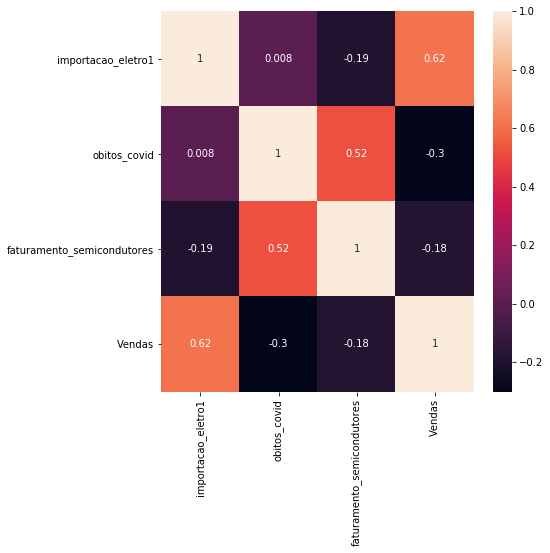

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 7))
sns.heatmap(dataframe.corr(), annot=True)

In [113]:
## Percebe-se que a importacao dos eletronicos (incluído os semicondutores) tem uma forte
## correlação positiva com as vendas de autoveiculos
## o numero de obitos tem correlação negativa moderada com as vendas de autoveiculos
## o numero de obitos e o faturamento com as vendas de eletornicos possuem forte correlação positiva 
## numero de obitos e importacao de componentes eletronicos fraca correlação negativa

In [114]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [115]:
dataframe.set_index('Data',inplace = True)

In [116]:
dataframe

,importacao_eletro1,obitos_covid,faturamento_semicondutores,Vendas
Data,,,,
2013-01-01,192332.7525,0,23128410,282886
2013-02-01,161716.0929,0,21104158,220859
2013-03-01,193147.2848,0,26216755,277268
2013-04-01,214318.6365,0,23547289,325865
2013-05-01,219928.6328,0,24311465,308411
...,...,...,...,...
2021-02-01,157234.2157,30438,38987959,186718
2021-03-01,187567.5391,66573,44329403,208801
2021-04-01,167266.4462,82266,42312766,191853


Text(0.5, 1.0, 'Óbitos Covid X Vendas Autoveículos X Importação de componentes eletrônicos')

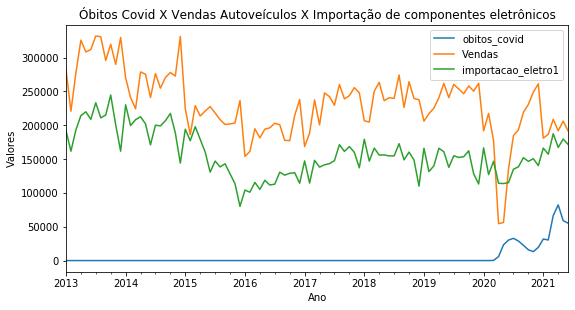

In [124]:
figura = plt.figure(figsize=(9,10))
plt.subplot(2,1,1)
dataframe['obitos_covid'].plot()
dataframe['Vendas'].plot()
dataframe['importacao_eletro1'].plot()
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Óbitos Covid X Vendas Autoveículos X Importação de componentes eletrônicos')

In [118]:
dataframe['faturamento_semicondutores'] = dataframe['faturamento_semicondutores'] / 100

Text(0.5, 1.0, 'Óbitos Covid X Vendas Autoveículos X Importação de componentes eletrônicos')

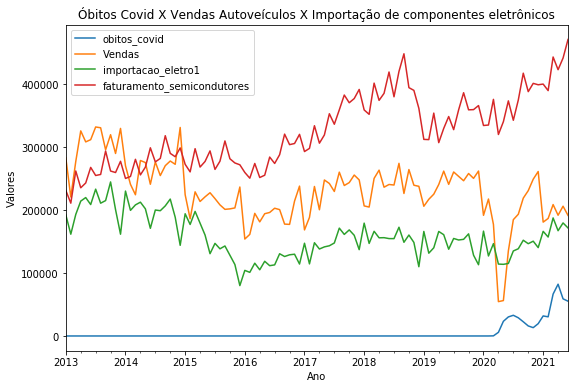

In [126]:
figura = plt.figure(figsize=(9,6))
dataframe['obitos_covid'].plot()
dataframe['Vendas'].plot()
dataframe['importacao_eletro1'].plot()
dataframe['faturamento_semicondutores'].plot()
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Óbitos Covid X Vendas Autoveículos X Importação de componentes eletrônicos')

## Considerações

#### O faturamento com os semicondutores (RED) nao foi muito afetado negativamente pela pandemia e os óbitos (BLUE), o gráfico do faturamento (RED) 
#### seguiu mantendo a tendência e o padrão histórico de oscilação;

#### Percebe-se que após o início da Covid-19 (BLUE) o faturamento aumentou muito (RED), chegando aos maiores niveis de faturamento com tendencias de crescimento,
#### justificado pela alta demanda gerada do setor automobilistico e de eletronicos em geral (setor de Video Games ainda esta com falta de estoques, 
#### durante um ano, por conta da falta de semicondutores um exemplo);

#### Importação de componentes eletrônicos (GREEN) decaiu, não seguindo o padrão histórico, com o inicio da pandemia e dos óbitos (BLUE),
#### o que contribuiu também para a queda nas vendas de autoveiculos (ORANGE)
#### pois semicondutores são peças essenciais.